In [9]:
import random
import numpy as np

# Define the MCMC simulation function
def mcmc_coin_game_simulation(starting_bankroll, num_simulations=10000):
    profits = []

    for _ in range(num_simulations):
        bankroll = starting_bankroll
        bet = 1
        
        while bankroll >= bet:
            if random.random() < 0.5:  # 50% chance to win
                bankroll += bet
                break
            else:  # 50% chance to lose
                bankroll -= bet
                bet *= 2
        
        profits.append(bankroll - starting_bankroll)
    
    return np.mean(profits), profits

# Parameters
num_simulations = 1000000


starting_bankroll = 63


# Run the MCMC simulation
mcmc_expected_profit, profits = mcmc_coin_game_simulation(starting_bankroll, num_simulations)
mcmc_expected_profit


0.001792

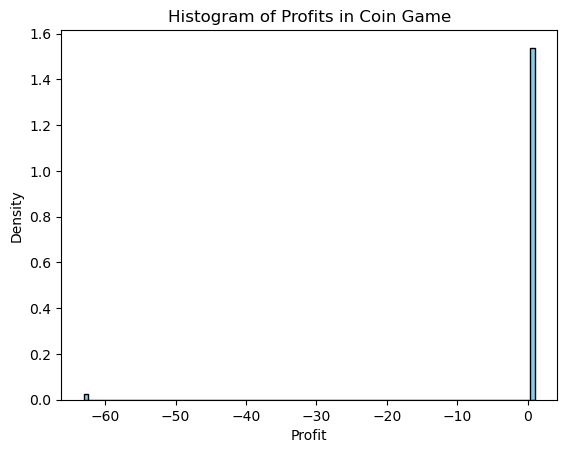

In [12]:
# Plot the histogram of profits
import matplotlib.pyplot as plt
    
plt.hist(profits, bins=100, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Profits in Coin Game')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.show()


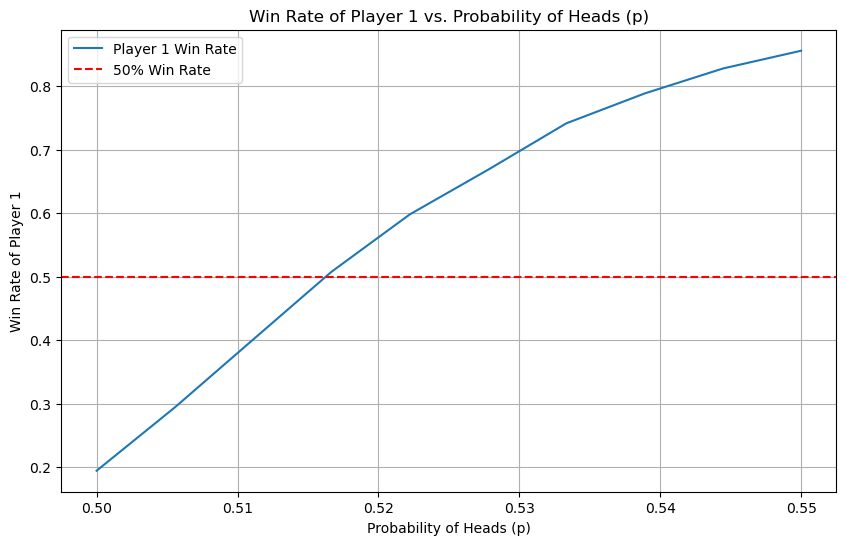

In [14]:
from scipy.optimize import minimize_scalar
import numpy as np
# Adjusting the simulation to run with fewer iterations per p value to speed up the process
def simulate_game_faster(p, player1_start, player2_start, num_simulations=10000):
    player1_wins = 0
    
    for _ in range(num_simulations):
        player1_balance = player1_start
        player2_balance = player2_start
        
        while player1_balance > 0 and player2_balance > 0:
            if np.random.random() < p:
                player1_balance += 1
                player2_balance -= 1
            else:
                player1_balance -= 1
                player2_balance += 1
        
        if player1_balance > 0:
            player1_wins += 1
    
    return player1_wins / num_simulations  # Return the win rate for player 1

import matplotlib.pyplot as plt

# Define a range of p values to evaluate
p_values = np.linspace(0.5, 0.55, 10)
win_rates = [simulate_game_faster(p, 10, 40) for p in p_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, win_rates, label="Player 1 Win Rate")
plt.axhline(0.5, color='red', linestyle='--', label="50% Win Rate")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Win Rate of Player 1")
plt.title("Win Rate of Player 1 vs. Probability of Heads (p)")
plt.legend()
plt.grid(True)
plt.show()
